In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from google.colab import files
uploaded = files.upload() 

Saving donaldtweets.csv to donaldtweets.csv


In [6]:
df = pd.read_csv('donaldtweets.csv')
df

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...


In [7]:
df.head()

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10360 non-null  int64 
 1   date        10360 non-null  object
 2   target      10358 non-null  object
 3   insult      10360 non-null  object
 4   tweet       10360 non-null  object
dtypes: int64(1), object(4)
memory usage: 404.8+ KB


In [9]:
df.isnull().sum()

Unnamed: 0    0
date          0
target        2
insult        0
tweet         0
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'date', 'target', 'insult', 'tweet'], dtype='object')

In [13]:
text_df = df.drop(['Unnamed: 0', 'date', 'target', 'insult'],axis=1)
text_df

,tweet
0,"Can you believe this fool, Dr. Thomas Frieden ..."
1,"Can you believe this fool, Dr. Thomas Frieden ..."
2,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,Politician @SenatorCardin didn't like that I s...
4,"For the nonbeliever, here is a photo of @Neily..."
...,...
10355,If Vice President @Mike_Pence comes through fo...
10356,"States want to correct their votes, which they..."
10357,"They just happened to find 50,000 ballots late..."
10358,The States want to redo their votes. They foun...


In [14]:
print(text_df['tweet'].iloc[0] ,"\n")
print(text_df['tweet'].iloc[1] ,"\n")
print(text_df['tweet'].iloc[2] ,"\n")
print(text_df['tweet'].iloc[3] ,"\n")
print(text_df['tweet'].iloc[4] ,"\n")

Can you believe this fool, Dr. Thomas Frieden of CDC, just stated, "anyone with fever should be asked if they have been in West Africa" DOPE 

Can you believe this fool, Dr. Thomas Frieden of CDC, just stated, "anyone with fever should be asked if they have been in West Africa" DOPE 

Big time in U.S. today - MAKE AMERICA GREAT AGAIN! Politicians are all talk and no action - they can never bring us back. 

Politician @SenatorCardin didn't like that I said Baltimore needs jobs & spirit. It's politicians like Cardin that have destroyed Baltimore. 

For the nonbeliever, here is a photo of @Neilyoung in my office and his $$ requestâ€”total hypocrite. http://t.co/Xm4BJvetIa 



In [15]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   10360 non-null  object
dtypes: object(1)
memory usage: 81.1+ KB


In [29]:
def data_process(tweets):
    tweets= tweets.lower()
    tweets= re.sub(r"https\S+|www\S+https\S+", '',tweets, flags=re.MULTILINE)
    tweets= re.sub(r'\@w+\#','',tweets)
    tweet_tokens = word_tokenize(tweets)
    filtered_tweet = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweet)

In [31]:
text_df.tweets = text_df['tweet'].apply(data_process)

In [32]:
text_df = text_df.drop_duplicates('tweet')

In [33]:
stemmer = PorterStemmer()
def stemming(data):
    tweet = [stemmer.stem(word) for word in data]
    return data

In [34]:
text_df['tweet'] = text_df['tweet'].apply(lambda x: stemming(x))

In [35]:
text_df.head()

,tweet
0,"Can you believe this fool, Dr. Thomas Frieden ..."
2,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,Politician @SenatorCardin didn't like that I s...
4,"For the nonbeliever, here is a photo of @Neily..."
5,".@Neilyoungâ€™s song, â€œRockinâ€™ In The Free..."


In [36]:
print(text_df['tweet'].iloc[0] ,"\n")
print(text_df['tweet'].iloc[1] ,"\n")
print(text_df['tweet'].iloc[2] ,"\n")
print(text_df['tweet'].iloc[3] ,"\n")
print(text_df['tweet'].iloc[4] ,"\n")

Can you believe this fool, Dr. Thomas Frieden of CDC, just stated, "anyone with fever should be asked if they have been in West Africa" DOPE 

Big time in U.S. today - MAKE AMERICA GREAT AGAIN! Politicians are all talk and no action - they can never bring us back. 

Politician @SenatorCardin didn't like that I said Baltimore needs jobs & spirit. It's politicians like Cardin that have destroyed Baltimore. 

For the nonbeliever, here is a photo of @Neilyoung in my office and his $$ requestâ€”total hypocrite. http://t.co/Xm4BJvetIa 

.@Neilyoungâ€™s song, â€œRockinâ€™ In The Free Worldâ€ was just one of 10 songs used as background music. Didnâ€™t love it anyway. 



In [37]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5673 entries, 0 to 10359
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   5673 non-null   object
dtypes: object(1)
memory usage: 88.6+ KB


In [38]:
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [39]:
text_df['polarity'] = text_df['tweet'].apply(polarity)

In [40]:
text_df.head(10)

,tweet,polarity
0,"Can you believe this fool, Dr. Thomas Frieden ...",0.000000
2,Big time in U.S. today - MAKE AMERICA GREAT AG...,0.237500
3,Politician @SenatorCardin didn't like that I s...,0.000000
4,"For the nonbeliever, here is a photo of @Neily...",0.000000
5,".@Neilyoungâ€™s song, â€œRockinâ€™ In The Free...",0.450000
6,Uncomfortable looking NBC reporter Willie Geis...,-0.170000
7,"Just out, the new nationwide @FoxNews poll has...",0.184091
8,The ratings for The View are really low. Nicol...,-0.021212
12,.@WhoopiGoldberg had better surround herself w...,0.562500
14,"I hear that dopey political pundit, Lawrence O...",-0.350000


In [43]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [42]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [44]:
text_df.head()

,tweet,polarity,sentiment
0,"Can you believe this fool, Dr. Thomas Frieden ...",0.0000,Neutral
2,Big time in U.S. today - MAKE AMERICA GREAT AG...,0.2375,Positive
3,Politician @SenatorCardin didn't like that I s...,0.0000,Neutral
4,"For the nonbeliever, here is a photo of @Neily...",0.0000,Neutral
5,".@Neilyoungâ€™s song, â€œRockinâ€™ In The Free...",0.4500,Positive


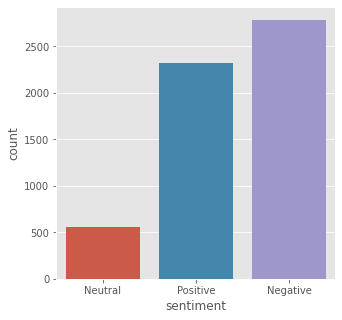

In [45]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

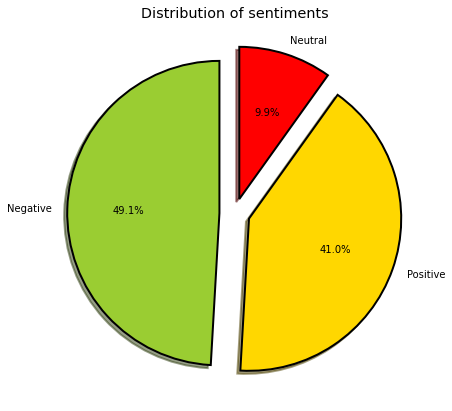

In [46]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [48]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,tweet,polarity,sentiment
7063,The Greatest Witch Hunt in the history of the ...,1.0,Positive
7621,Thank you Steve. The greatest Witch Hunt in U....,1.0,Positive
4142,Comey gave Strozk his marching orders. Mueller...,1.0,Positive
5863,.....The Witch Hunt is over but we will never ...,1.0,Positive
9576,A great Scam against our Country! https://t.co...,1.0,Positive


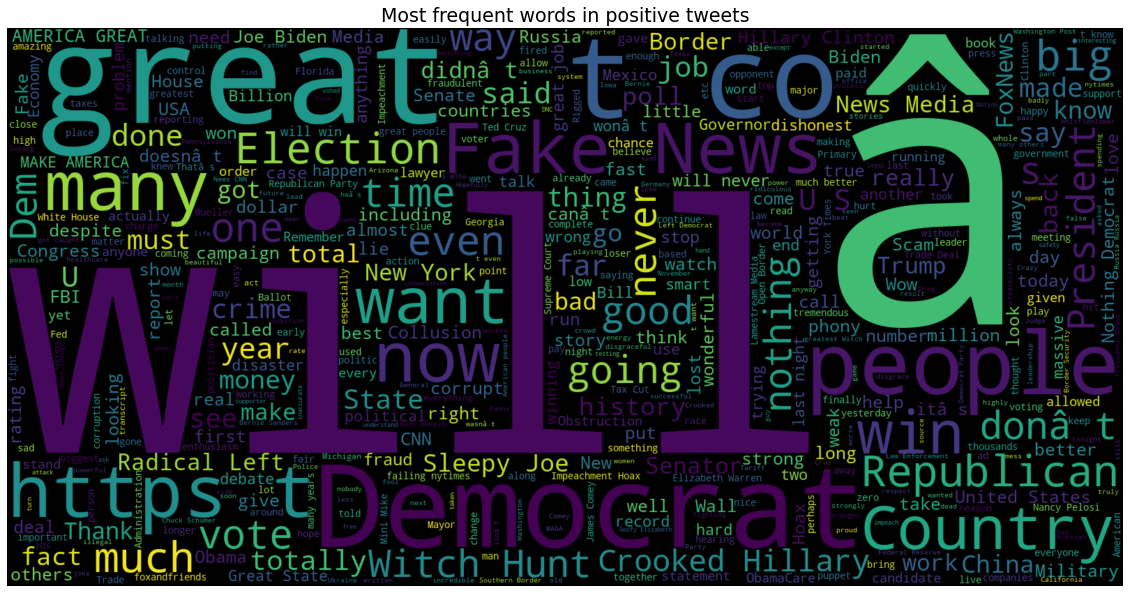

In [51]:
tweet = ' '.join([word for word in pos_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [52]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,tweet,polarity,sentiment
1262,So many false and phony T.V. commercials being...,-5.551115e-17,Negative
9574,Sleepy Joe Biden just closed down his campaign...,-6.944444e-04,Negative
8992,The Democrats in the House are trying to undo ...,-1.111111e-03,Negative
7541,The Stock Market hit another Record High yeste...,-1.111111e-03,Negative
3244,"...LaVar, you could have spent the next 5 to 1...",-1.250000e-03,Negative


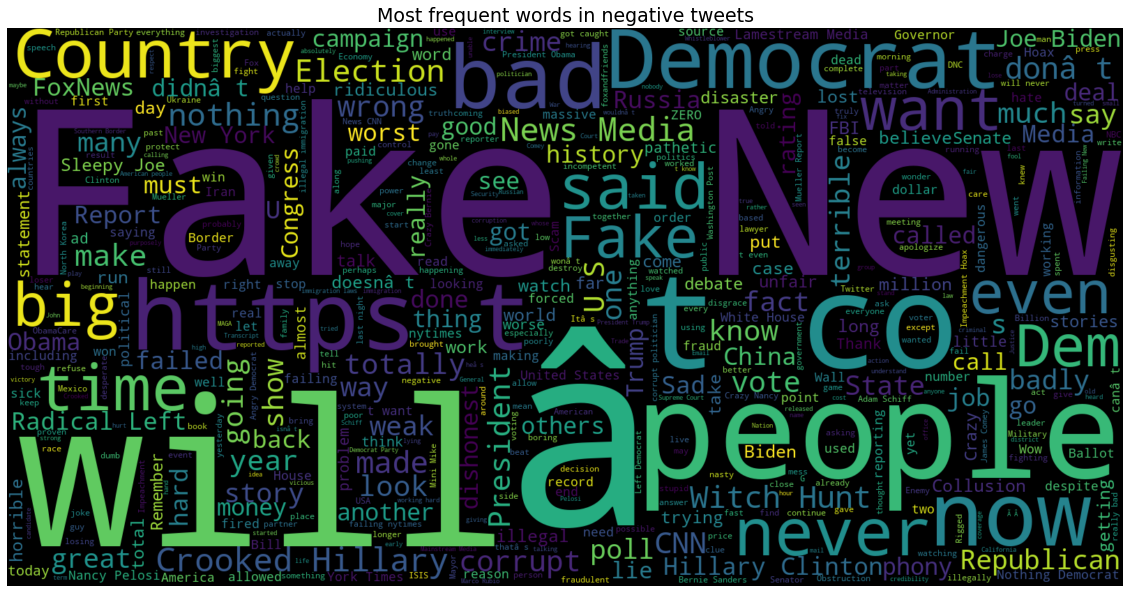

In [53]:
tweet = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [54]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,tweet,polarity,sentiment
0,"Can you believe this fool, Dr. Thomas Frieden ...",0.0,Neutral
6996,Democrats are trying to undo the Election rega...,0.0,Neutral
6920,Adam Schiff has zero credibility. Another fant...,0.0,Neutral
6921,"Liddleâ€™ Adam Schiff, who has worked unsucces...",0.0,Neutral
6944,The Democrats are now to be known as the DO NO...,0.0,Neutral


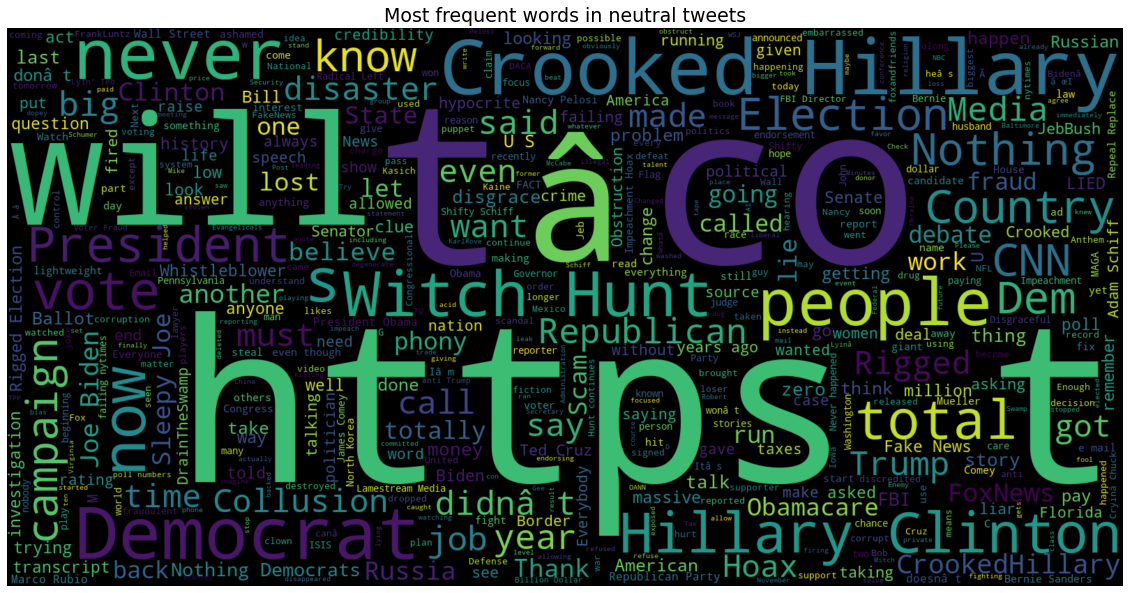

In [56]:
tweet= ' '.join([word for word in neutral_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [58]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['tweet'])

In [59]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 90733

First 20 features:
 ['00', '00 and', '00 at', '00 cnn', '00 fantastic', '00 foxnews', '00 from', '00 no', '00 north', '00 on', '00 oâ', '00 their', '00 they', '00 this', '00 to', '00 today', '00 will', '000', '000 00', '000 000']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
X = text_df['tweet']
Y = text_df['sentiment']
X = vect.transform(X)

In [62]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (4538, 90733)
Size of y_train: (4538,)
Size of x_test: (1135, 90733)
Size of y_test: (1135,)


In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 79.47%


In [66]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[471  12  57]
 [ 39  57  19]
 [ 86  20 374]]


              precision    recall  f1-score   support

    Negative       0.79      0.87      0.83       540
     Neutral       0.64      0.50      0.56       115
    Positive       0.83      0.78      0.80       480

    accuracy                           0.79      1135
   macro avg       0.75      0.72      0.73      1135
weighted avg       0.79      0.79      0.79      1135



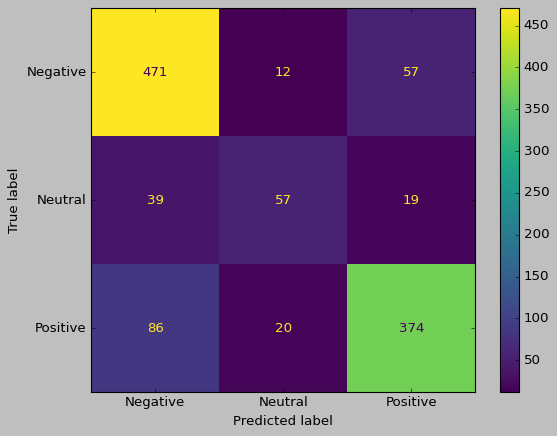

In [67]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [70]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [71]:
y_pred = grid.predict(x_test)

In [72]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 80.09%


In [73]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[468  15  57]
 [ 33  65  17]
 [ 81  23 376]]


              precision    recall  f1-score   support

    Negative       0.80      0.87      0.83       540
     Neutral       0.63      0.57      0.60       115
    Positive       0.84      0.78      0.81       480

    accuracy                           0.80      1135
   macro avg       0.76      0.74      0.75      1135
weighted avg       0.80      0.80      0.80      1135



In [74]:
from sklearn.svm import LinearSVC

In [75]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [76]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 79.65%


In [77]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[460  18  62]
 [ 28  71  16]
 [ 76  31 373]]


              precision    recall  f1-score   support

    Negative       0.82      0.85      0.83       540
     Neutral       0.59      0.62      0.60       115
    Positive       0.83      0.78      0.80       480

    accuracy                           0.80      1135
   macro avg       0.74      0.75      0.75      1135
weighted avg       0.80      0.80      0.80      1135



In [78]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [79]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.1}


In [80]:
y_pred = grid.predict(x_test)

In [81]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 79.47%


In [82]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[465  15  60]
 [ 38  61  16]
 [ 80  24 376]]


              precision    recall  f1-score   support

    Negative       0.80      0.86      0.83       540
     Neutral       0.61      0.53      0.57       115
    Positive       0.83      0.78      0.81       480

    accuracy                           0.79      1135
   macro avg       0.75      0.72      0.73      1135
weighted avg       0.79      0.79      0.79      1135



In [84]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

In [85]:
#Logistic-Regression -79.47%
#tuned Logistic Regression - 80.09%
#SVC - 79.65%
#Tuned SVC - 79.47%